In [1]:
%ls

EU_drought_maps_2003_2018_8d.nc  images/   README.md
extra_utils/                     masks.nc  visualization.ipynb


In [2]:
import numpy as np
import xarray as xr

from extra_utils.nc_tools import xr2np
from extra_utils.drought_vis import plot_drought_map
from extra_utils.drought_vis import plot_drought_signal_curve
from extra_utils.drought_vis import generate_drought_animation

In [3]:
drought_maps = xr.load_dataset("./EU_drought_maps_2003_2018_8d.nc")
gt = xr.load_dataset("./masks.nc")

# "2012-01-01", "2013-12-31"
# "2012-06-05", "2012-08-24"
drought_maps = drought_maps.sel(time=slice("2012-01-01", "2013-12-31")) # 
gt = gt.sel(time=slice("2012-01-01", "2013-12-31"))

# "Russian" 59., 43., 30., 64
local_maps = drought_maps.sel(lat=slice(59., 43.), lon=slice(30., 64.))
local_gt = gt.sel(lat=slice(59., 43.), lon=slice(30., 64.))
local_str = "Russian"

dates = np.array(gt['time'].dt.strftime("%Y%m%d")).astype(str)

print(drought_maps)
print(gt)

<xarray.Dataset>
Dimensions:         (lat: 672, lon: 1176, time: 92)
Coordinates:
  * lat             (lat) float64 81.46 81.38 81.29 81.21 ... 25.71 25.63 25.54
  * lon             (lon) float64 -27.96 -27.88 -27.79 ... 69.79 69.87 69.96
  * time            (time) datetime64[ns] 2012-01-05 2012-01-13 ... 2013-12-31
Data variables:
    drought_prob_0  (time, lat, lon) float32 0.0016096185 ... 0.6525794
    drought_prob_1  (time, lat, lon) float32 0.00045798623 ... 0.058530077
    drought_prob_2  (time, lat, lon) float32 0.0007845849 ... 0.06479364
    drought_prob_3  (time, lat, lon) float32 0.002251981 ... 0.5932771
    drought_prob_4  (time, lat, lon) float32 0.00010991743 ... 0.108264536
<xarray.Dataset>
Dimensions:     (lat: 672, lon: 1176, time: 92)
Coordinates:
  * lat         (lat) float64 81.46 81.38 81.29 81.21 ... 25.71 25.63 25.54
  * lon         (lon) float64 -27.96 -27.88 -27.79 -27.71 ... 69.79 69.87 69.96
  * time        (time) datetime64[ns] 2012-01-05 2012-01-13 ... 20

In [4]:
print(dates[20])

20120613


In [5]:
drought_maps = xr2np(drought_maps)
gt = np.transpose(xr2np(gt),axes=(2, 0, 1))
local_maps = xr2np(local_maps)
local_gt = np.transpose(xr2np(local_gt),axes=(2, 0, 1))
print(drought_maps.shape)
print(gt.shape)

(5, 92, 672, 1176)
(92, 672, 1176)


/root/mambaforge/envs/drought_monitor/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


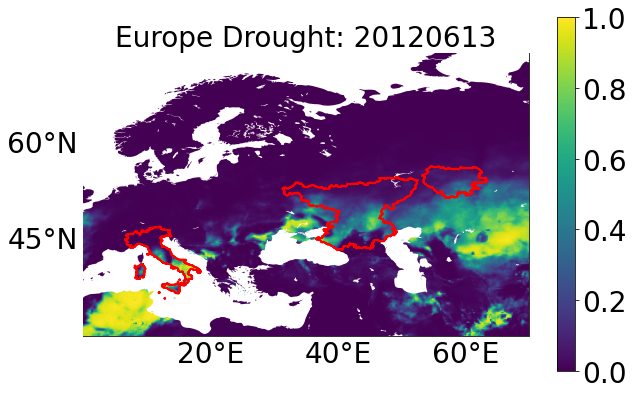

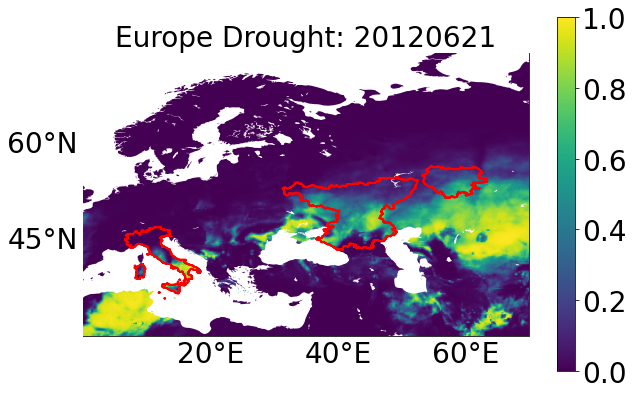

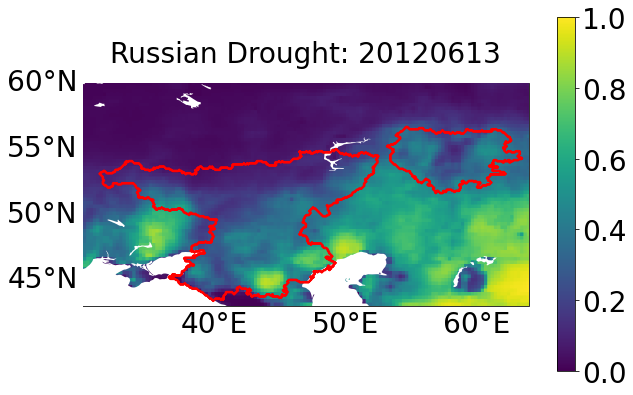

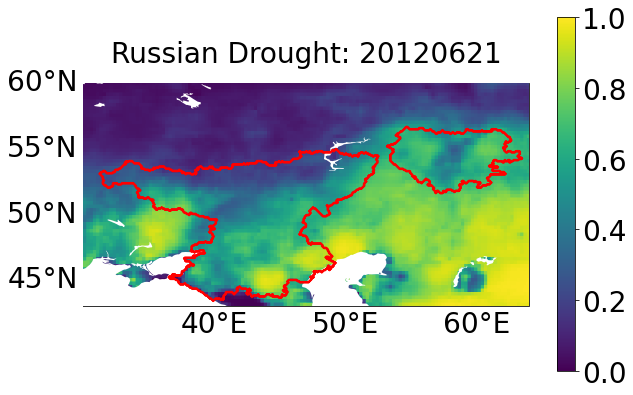

In [6]:
plot_drought_map(drought_maps[0, 20:22], gt[20:22], place_str="Europe", date_list=dates[20:22])
plot_drought_map(local_maps[0, 20:22], local_gt[20:22], place_str=local_str, date_list=dates[20:22])

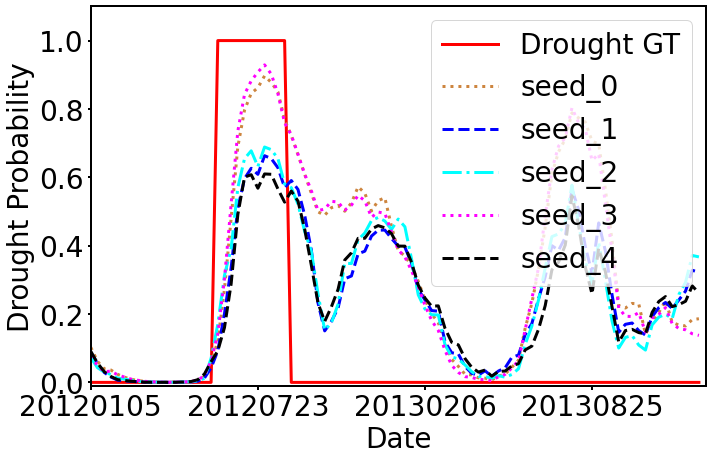

In [7]:
plot_drought_signal_curve([local_maps[0], local_maps[1], local_maps[2], local_maps[3], local_maps[4]], local_gt, 
                          ["seed_0", "seed_1", "seed_2", "seed_3", "seed_4"], dates)

In [8]:
%ls ./images/

seed_0_maps/


In [9]:
%rm -rf ./images/*

In [10]:
image_path = plot_drought_map(drought_maps[0], gt, place_str="Europe", date_list=dates, 
                              method_str="seed_0", save_path="./images/")
gif_path = generate_drought_animation(search_path=image_path, start_date="20120101", end_date="20131231")

/root/mambaforge/envs/drought_monitor/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


<Figure size 432x288 with 0 Axes>

In [ ]:
%ls ./images/seed_0_maps/ 

from IPython.display import Image
Image(gif_path)

![SegmentLocal](./images/seed_0_maps/20120101_20131231_maps.gif "segment")